    Fundamentos de Data Science
Analizando la Satisfacción de Clientes en la Industria Hotelera

    Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

El dataset puede ser encontrado aquí.

    Limpieza de datos con Python:
1) Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
2) Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
3) Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).
4) Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
5) Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

    Exploración de datos con Python:
* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

    Análisis adicional:
- Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
- Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

Entrega:

Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.
Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.
NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

Notas:

* Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.
* Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.
* Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.
* Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA. Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. La falta de citas será considerada plagio y resultará en la falla del examen.
* No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.
* Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# cargo el dataset

path = '../data/hotel_bookings.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.head(10)

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


Limpieza de Datos

In [16]:
# Detección y eliminación de valores duplicados

duplicados = df.duplicated()
print(f"Se han detectado {duplicados.sum()} registros duplicados y fueron eliminads.")
sc_salarios_sin_duplicados = df.drop_duplicates()

Se han detectado 31994 registros duplicados y fueron eliminads.


In [ ]:
df.info()


In [ ]:
# Verificación y ajuste de tipos de datos: 
# Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
# Creo un diccionario con los tipos de datos deseados y los reemplazo
data_type = {
    'hotel' : 'string',
    'meal' : 'string',
    'country' : 'string',
    'market_segment' : 'string',
    'distribution_channel' : 'string',
    'reserved_room_type' : 'string',
    'assigned_room_type' : 'string',
    'deposit_type' : 'string',
    'customer_type' : 'string',
    'reservation_status' : 'string',
    'reservation_status_date' : 'string',
}
df = df.astype(data_type)
print(df.dtypes)


In [ ]:
# Consistencia en valores categóricos: 
# Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

# identifico las columnas de tipo cadena
columnas_string = df.select_dtypes(include=['object', 'string'])

# Mostrar valores únicos de cada columna de tipo cadena
for col in columnas_string.columns:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()

In [ ]:
# Convertir las cadenas en minúsculas
def cadena_minus(cadena):
    if isinstance(cadena , str):
        cadena = cadena.lower()
    return cadena
# aplicar la funcion a las columnas tipo cadena
for col in columnas_string:
    df[col] = df[col].apply(cadena_minus)
# Verificar los cambios
for col in columnas_string:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())

In [21]:
# Manejo de valores faltantes: 
# Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

# identifico las columnas con valores faltantes
columnas_faltantes = df.isnull().any()
# identifico los valores faltantes
valores_faltantes = df.isnull().sum()
print(f"Se han detectado {valores_faltantes.sum()} valores faltantes en el dataset.")

Se han detectado 129425 valores faltantes en el dataset.


In [ ]:
# funcion para visualizar los valores faltantes en % 
# fuente del codigo: https://github.com/iair/mitic-data-science-team-1-septiembre-2024/blob/main/clases/ds-fundamentals/semana-3/valores_nulos_2.ipynb

qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

In [23]:
# Se observa solo 2 columnas con valores faltantes en porcentaje sobre el 1% de los datos y una con menos del 1%
# una de ellas posee un faltante del 94% por lo que se plantea eliminar la columna

df.drop('company', axis=1, inplace=True)

print("Se ha eliminado la columna company")

Se ha eliminado la columna company


In [24]:
# Para la columna Agent se verifica que es de tipo numerico y representa el ID del representante de viaje.
# En este caso no se pueden rellenar los valores con operaciones como la media ni usar datos cercanos.
# Bastaria con indicar que la id del representante de viaje no esta disponible para esa entrada

# aunque la columna agent tiene datos numericos de tipo float, al ser un ID de representante de viaje no representaria ningun problema
# convertilo a tipo string ya que esos numeros no se usaran para realizar operaciones matematicas ni calculos estadisticos
df['agent'] = df['agent'].astype(object) 
# rellenar los valores faltantes de agent y country
df['agent'] = df['agent'].fillna('None')
df['country'] = df['country'].fillna('None') # al tener un infimo % de NA se de rellena con none

In [ ]:
# comprobamos los resultados
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

In [57]:
# Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual 
# se verifica algunas posibles columnas conflictivas
verif_columnas = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr']
df[verif_columnas].describe()

,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,required_car_parking_spaces,adr
count,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000
mean,0.927599,2.500302,1.856403,0.103890,0.007949,0.062518,101.831122
std,0.998613,1.908286,0.579261,0.398561,0.097436,0.245291,50.535790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,69.290000
50%,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,94.575000
75%,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,126.000000
max,19.000000,50.000000,55.000000,10.000000,10.000000,8.000000,5400.000000


In [58]:
# se verifican los datos unicos de las columnas y se revisa cada caso
for col in verif_columnas:
    print(f"Valores únicos en '{col}':")
    print(df[col].unique())

Valores únicos en 'stays_in_weekend_nights':
[ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]
Valores únicos en 'stays_in_week_nights':
[ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 42 50 25 17 32 26 18 34 35 41]
Valores únicos en 'adults':
[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
Valores únicos en 'children':
[ 0.  1.  2. 10.  3. nan]
Valores únicos en 'babies':
[ 0  1  2 10  9]
Valores únicos en 'required_car_parking_spaces':
[0 1 2 8 3]
Valores únicos en 'adr':
[  0.    75.    98.   ... 266.75 209.25 157.71]


In [69]:
# A excepcion de la columna adr, no se encuentra ningun dato que salga fuera de los parametros normales considerando que hay mucha 
# variabilidad dentro de los rangos, por lo que se interpreta que ninguna cantidad es exagerada
# volvemos a verificar la columna adr

filtro = df[df['adr'] > 500]['adr']
print(filtro)
filtro = df[df['adr'] < 0]['adr']
print(filtro)

15083     508.0
48515     540.0
111403    510.0
Name: adr, dtype: float64
14969   -6.38
Name: adr, dtype: float64


In [73]:
# Se verifica que hay un valor fuera de los rangos normales ya que 5400 es desproporcionado en comparacion a los valores mayores que le siguen
# que son 510 y 508, por lo que se llega a la conclusion que el dato se cargo con un 0 demás
# Lo corregimos dividiendo con 10 todos los mayores a 1000
df.loc[df['adr'] > 1000, 'adr'] = df['adr'] / 10

# corregimos el valor menor a cero multiplicandolo por - 1 para hacerlos positivo
df.loc[df['adr'] < 0, 'adr'] = df['adr'] * -1
df['adr'].describe()



count    119390.000000
mean        101.790468
std          48.169934
min           0.000000
25%          69.290000
50%          94.575000
75%         126.000000
max         540.000000
Name: adr, dtype: float64

Exploración de datos con Python:

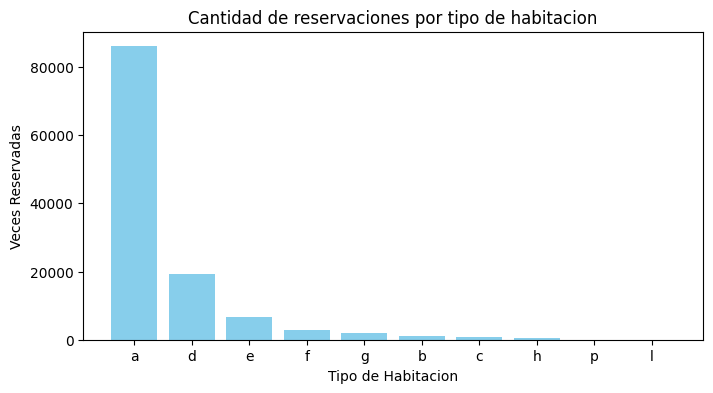

In [29]:
# Visualizaciones exploratorias univariadas: 
# Crea dos tipos diferentes de visualizaciones univariadas. 
# Cada visualización debe incluir una breve interpretación dentro del archivo de código.
# crear el gráfico de barras de la cantidad de veces que se reservo una habitacion clasificado por tipo
# cuantificamos la cantidad de reservciones por cada tipo de cuarto
room_type = df['reserved_room_type'].value_counts()
# creamos el grafico
plt.figure(figsize=(8, 4))
plt.bar(room_type.index, room_type.values, color='skyblue')
plt.title('Cantidad de reservaciones por tipo de habitacion')
plt.xlabel('Tipo de Habitacion')
plt.ylabel('Veces Reservadas')
plt.xticks(rotation=0)
plt.show()



Se puede verificar que el tipo de habitacion "a" es la mas reservada por amplia mayoria

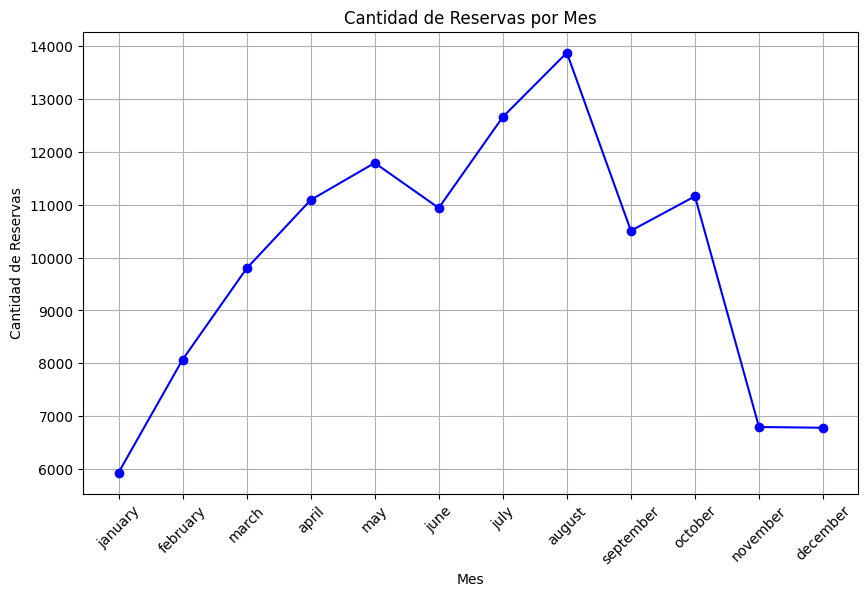

In [30]:
# ordenamos los meses para una mejor visualizacion

meses_ordenados = ['january', 'february', 'march', 'april', 'may', 'june', 
    'july', 'august', 'september', 'october', 'november', 'december']

# cuantificamos la cantidad de reservaciones por mes
reservas_por_mes = df['arrival_date_month'].value_counts().reindex(meses_ordenados)
# creamos el grafico de lineas
plt.figure(figsize=(10, 6))  
plt.plot(reservas_por_mes.index, reservas_por_mes.values, marker='o', linestyle='-', color='b')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Reservas')
plt.title('Cantidad de Reservas por Mes')
plt.xticks(rotation=45)
# mostramos el grafico
plt.grid(True)
plt.show()

Este grafico muestra un pico de reservas en el mes de agosto lo cual resulta un poco confuso ya que uno esperaria picos en los meses de festivos como 
diciembre y enero. De momento se desconoce la causa pero una hipotesis seria la reduccion del precio de las habitaciones en estos meses.

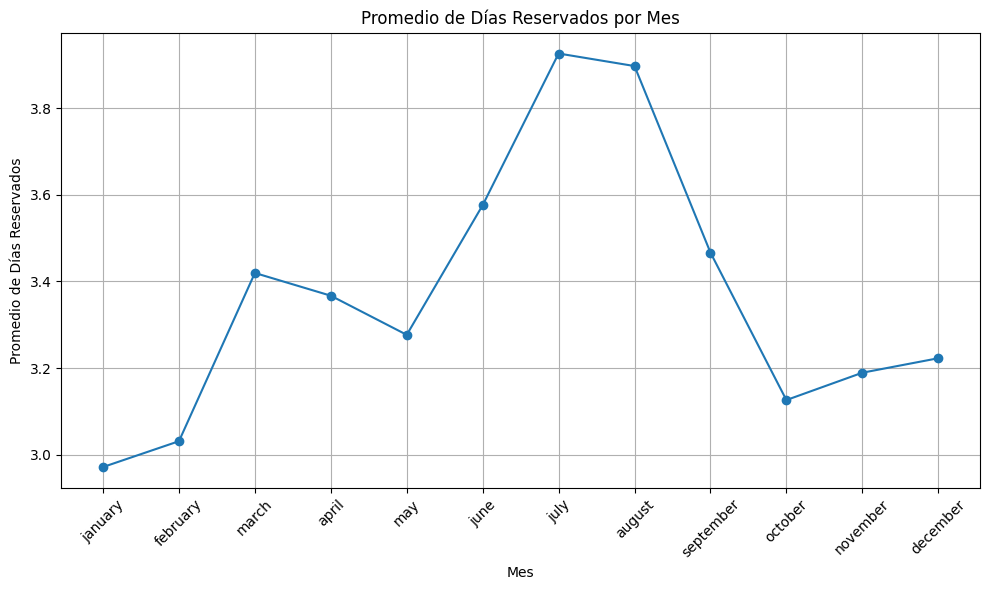

In [92]:
# Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. 
# Cada visualización debe incluir una breve interpretación dentro del archivo de código.

#Promedio de cantidad de dias reservados por dia dividido por cada mes
# creamos la columna con los dias totales de reservacion por entrada sumando los dias de entre semana y sus correspondientes dias de fin de semana
df['total_days'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
# sacamos el promedio por mes
promedio_por_mes = df.groupby('arrival_date_month')['total_days'].mean().reindex(meses_ordenados).reset_index()

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(promedio_por_mes['arrival_date_month'], promedio_por_mes['total_days'], marker='o')
plt.title('Promedio de Días Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Días Reservados')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# creamos el grafico cantidad de reservaciones por mes por hotel
y1 = df[df['hotel'] == 'resort hotel']
y2 = df[df['hotel'] == 'city hotel']
reservas_por_mes_hotel = df.groupby(['arrival_date_month', 'hotel']).size().unstack()
print(reservas_por_mes_hotel) 
total_por_hotel = df['hotel'].value_counts()
print("\n")
print(total_por_hotel)

plt.figure(figsize=(12, 6))

# Generar los índices (posiciones) para las barras y asiganar variables
meses = reservas_por_mes_hotel.index
indices = np.arange(len(meses))
ancho_barras = 0.35
plt.bar(indices - ancho_barras/2, reservas_por_mes_hotel['resort hotel'], width=ancho_barras, label='resort hotel', color='skyblue')
plt.bar(indices + ancho_barras/2, reservas_por_mes_hotel['city hotel'], width=ancho_barras, label='city hotel', color='orange')

# Etiquetas y leyenda
plt.title('Cantidad de reservaciones por mes y por hotel')
plt.xlabel('Mes')
plt.ylabel('Cantidad de reservaciones')
plt.xticks(indices, meses, rotation=0)
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

En este grafico se observa que el hotel 2 tiene muchas mas reservaciones en promedio por mes pero tambien tiene el doble de entradas en el dataset por lo que no se puede hacer ninguna conclusion sobre la preferencia de la gente

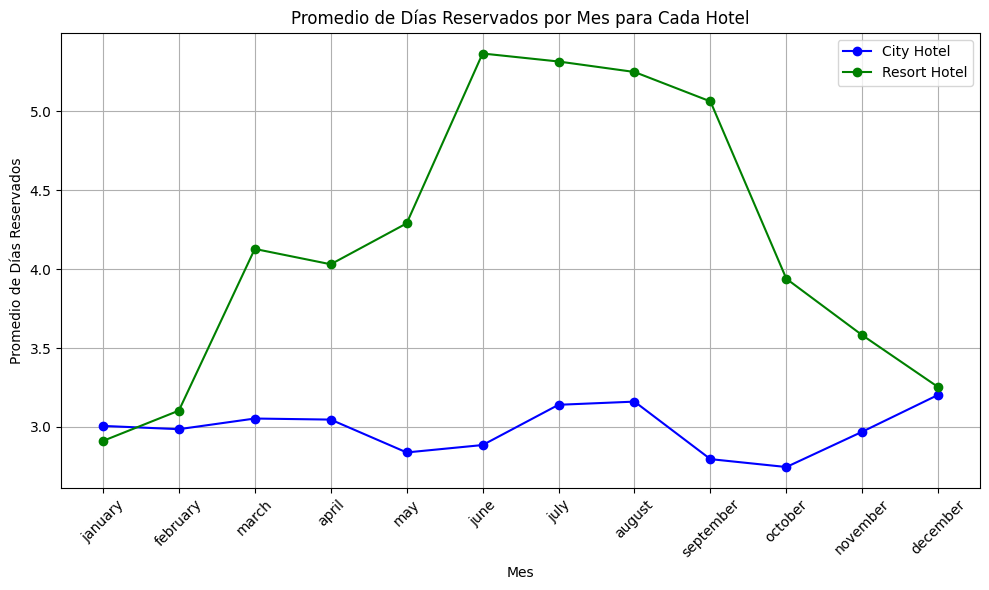

In [91]:

# Definir el orden de los meses y aplicar el filtor por hotel
meses_ordenados = ['january', 'february', 'march', 'april', 'may', 'june', 
                   'july', 'august', 'september', 'october', 'november', 'december']

hotel1 = df[df['hotel'] == 'city hotel']
hotel2 = df[df['hotel'] == 'resort hotel']

# Calcular el promedio por mes para cada hotel y reindexar por orden
promedio_hotel1 = hotel1.groupby('arrival_date_month')['total_days'].mean().reset_index()
promedio_hotel2 = hotel2.groupby('arrival_date_month')['total_days'].mean().reset_index()

promedio_hotel1 = promedio_hotel1.set_index('arrival_date_month').reindex(meses_ordenados).reset_index()
promedio_hotel2 = promedio_hotel2.set_index('arrival_date_month').reindex(meses_ordenados).reset_index()

# Graficar los resultados
plt.figure(figsize=(10, 6))

plt.plot(promedio_hotel1['arrival_date_month'], promedio_hotel1['total_days'], marker='o', label='City Hotel', color='blue')
plt.plot(promedio_hotel2['arrival_date_month'], promedio_hotel2['total_days'], marker='o', label='Resort Hotel', color='green')

plt.title('Promedio de Días Reservados por Mes para Cada Hotel')
plt.xlabel('Mes')
plt.ylabel('Promedio de Días Reservados')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Hay una diferencia muy importante en el promedio de cantidad de dias entre ambos hoteles
* Para el City Hotel vemos una tendencia estable durante todo el año sin picos importantes
* Para el Resort Hotel tenemos un promedio de dias superior durante todo el año y con un pico muy importante entre junio y septiembre

Análisis adicional:

In [86]:
# Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, 
# incluyendo medidas de tendencia central y dispersión para las variables numéricas.

# Analizamos el promedio de dias reservados por hotel
resumen_por_hotel_days = df.groupby('hotel')['total_days'].agg(['mean', 'median', lambda x: x.mode()[0]])
resumen_por_hotel_days.columns = ['Media', 'Mediana', 'Moda']
print(resumen_por_hotel_days)

                 Media  Mediana  Moda
hotel                                
city hotel    2.978142      3.0     2
resort hotel  4.318547      3.0     1


In [75]:
# Promedio de adr por hotel
resumen_por_hotel_adr = df.groupby('hotel')['adr'].agg(['mean', 'median', lambda x: x.mode()[0]])
resumen_por_hotel_adr.columns = ['Media', 'Mediana', 'Moda']
print(resumen_por_hotel_adr)

                   Media  Mediana  Moda
hotel                                  
city hotel    105.243202     99.9  62.0
resort hotel   94.953089     75.0  48.0


En este pequeño analisis podemos notar un mayor precio en promedio del city hotel lo cual podria justificar que tenga un menor promedio
de dias reservados, ya que un menor precio implica que la gente puede permitirse una estadia mas larga

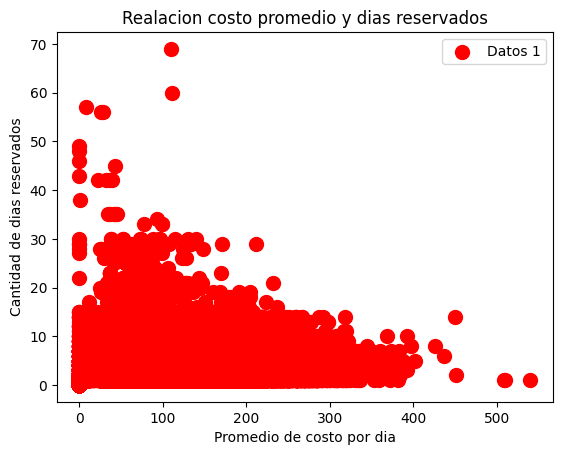

In [105]:
x3 = df['total_days']
y3 = df['adr']
plt.scatter(y3, x3, color='r', marker='o', s=100, label='Datos 1')
plt.title("Relacion costo promedio y dias reservados")
plt.xlabel("Promedio de costo por dia")
plt.ylabel("Cantidad de dias reservados")
plt.legend()
plt.show()

A mas costo menos dias de reserva, una relacion normal que se cumple en este caso

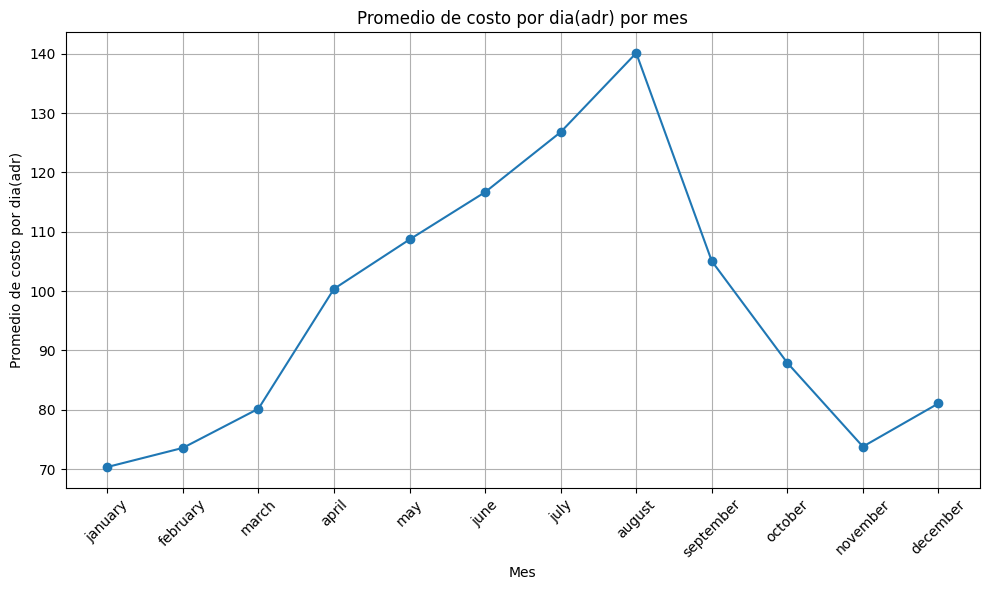

In [111]:
# promedio de costo por dia clasificado por mes
# agrupamos por mes, calculamos el promedio y ordenamos los meses

adr_mes = df.groupby('arrival_date_month')['adr'].mean().reindex(meses_ordenados).reset_index()

# Grafico

plt.figure(figsize=(10, 6))
plt.plot(adr_mes['arrival_date_month'], adr_mes['adr'], marker='o')
plt.title('Promedio de costo por dia(adr) por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de costo por dia(adr)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

* Mirando el promedio de costo promedio vemos un pico en el mes de agosto, el costo empieza a elevarse desde el mes de enero y despues de llegar al punto
maximo en agosto, este empieza a bajar de nuevo.
* Ya se observó en graficos y analisis anteriores que existe una mayor cantidad de reservas en estos meses en cuestion, mencionando tambien que las reservas
en esa epoca son mas extendidas (mas dias reservados)-
* Este resultado indica que la temporada alta se ubica entre Junio y Septiembre.
* Como recomendacion final, teniendo en cuenta este dataset se puede utilizar los resultados para afirmar que la mejor epoca para hacer una reservacion y evitar precios altos y una alta concurrencia de personas es en los meses iniciales del año y en el ultimo trimestre, al menos en los hoteles en cuestion.